In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image 
from read_write_mrc import read_mrc, write_mrc
import skimage 
import torch 
import torchvision as transforms 
from PIL import Image 
import os 

In [2]:
img = read_mrc('KLW_PBC_INS1e_Ex-4_5min_1111_8_pre_rec.mrc')

In [3]:
img.shape

(469, 485, 469)

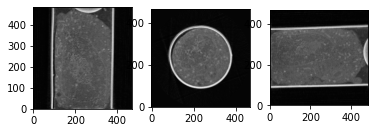

In [4]:
i = 260

plt.figure()

plt.subplot(1,3,1)
plt.imshow(img[i,:,:], cmap = 'gray', origin = 'lower')


plt.subplot(1,3,2)
plt.imshow(img[:,i,:], cmap = 'gray', origin = 'lower')



plt.subplot(1,3,3)
plt.imshow(img[:,:,i], cmap = 'gray', origin = 'lower')


plt.show()

In [5]:
def normalisation(img):
    norm_img = (img-img.min())/(img.max()-img.min())
    return norm_img

In [6]:
def a_hist_eq(img):
    eq_img = skimage.exposure.equalize_adapthist(img)   
    return eq_img

def hist_eq(img):
    eq_img = skimage.equalize.equalize_hist(img)
    return eq_img

In [7]:
def padding(img):
    
    if (img.shape[1]%2 != 0):
        pad_img = np.pad(img, pad_width= (  (int((500-img.shape[0])/2),int((500-img.shape[0])/2+1))   ,  ( int((700-img.shape[1])/2), int((700-img.shape[1])/2+1)),  ( int((500-img.shape[2])/2), int((500-img.shape[2])/2+1)  ))) 
    
    if (img.shape[1]%2 ==0):
        pad_img = np.pad(img, pad_width= (  (int((500-img.shape[0])/2),int((500-img.shape[0])/2+1))   ,  ( int((700-img.shape[1])/2), int((700-img.shape[1])/2)),  ( int((500-img.shape[2])/2), int((500-img.shape[2])/2+1)  )))
    
    return pad_img    

In [8]:
def slice_mrc(img):
    slices = []
    for i in range(len(img.shape)):
        for j in range(img.shape[i]):
            if 5*j<(img.shape[i]-9): 
                if (i ==0):
                    im = img[5*j:5*j+10]
                    slices.append(im)
                    # write_mrc('sliced'+str(i)+str(j)+'.mrc', im)
                if (i ==1):
                    im = img[:,5*j:5*j+10,:]
                    slices.append(im)
                    # write_mrc('sliced'+str(i)+str(j)+'.mrc', im)
                if (i ==2):
                    im = img[:,:,5*j:5*j+10]
                    slices.append(im)
                    # write_mrc('sliced'+str(i)+str(j)+'.mrc', im)
                    
    return slices
    

In [36]:
img = read_mrc('KLW_PBC_INS1e_Ex-4_5min_1111_8_pre_rec.mrc')
directory = 'test/mrc'
X = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename )
    
    img = read_mrc(f)
    norm_img = normalisation(img)
    eq_img = hist_eq(norm_img)
    pad_img = padding(eq_img)
    img_slices = slice_mrc(pad_img)
    X.append(img_slices)   

In [39]:
# print(len(X))
# print(type(X))

# for slices_list in X:
#     print(type(slices_list))       

In [38]:
in_x = 0
in_y = 0
in_z = 0

for slices_list in X:
    for slices in slices_list:
        if slices.shape == (10,700,500):
            in_x = in_x +1
        if slices.shape == (500,10,500):
            in_y = in_y + 1
        if slices.shape == (500,700,10):
            in_z = in_z+1
                      
print(in_x,in_y,in_z)

5544 7784 5544


/tmp/ipykernel_1203393/3503056298.py:5: RuntimeWarning: invalid value encountered in power
  g_img = img**gamma


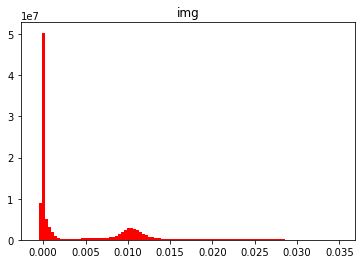

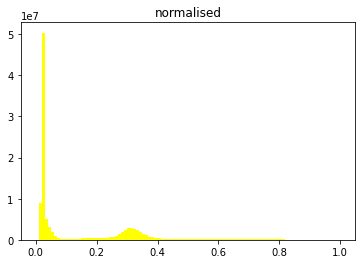

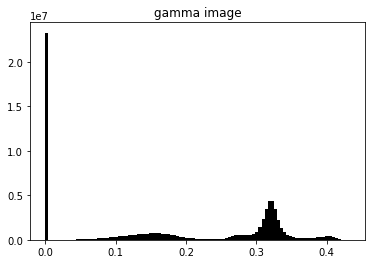

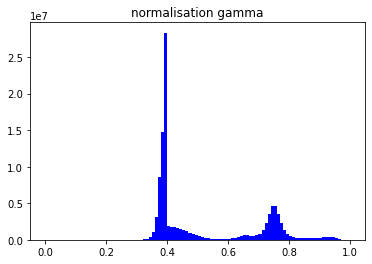

In [69]:
img = read_mrc('KLW_PBC_INS1e_Ex-4_5min_1111_8_pre_rec.mrc')



norm_img = normalisation(img)
gamma = 0.25
g_img = img**gamma
n_g_img = norm_img**gamma 
g_n_img = normalisation(g_img)



In [ ]:
plt.figure()
# plt.subplot(1,5,1)
plt.hist(img.flatten(), bins = 100, color = 'red')
plt.title(label = 'img')

# plt.subplot(1,5,2)
plt.figure()
plt.hist(norm_img.flatten(), bins = 100, color = 'yellow')
plt.title(label = 'normalised')

# plt.subplot(1,5,3)
plt.figure()
plt.hist(g_img.flatten(), bins = 100, color = 'black')
plt.title(label = 'gamma image')

# plt.subplot(1,5,4)
# plt.hist(g_n_img.flatten(), bins = 100)
# plt.title(label = 'gamma normalisation')

# plt.subplot(1,5,5)
plt.figure()
plt.hist(n_g_img.flatten(), bins = 100, color = 'blue')
plt.title(label = 'normalisation gamma')

plt.show()
# write_mrc('gamma.mrc',img_gamma)

In [63]:
write_mrc('gamma.mrc', n_g_img)  #not good enough

In [64]:
nghe_hist = hist_eq(n_g_img)

write_mrc('g_h_e.mrc_e.mrc', nghe_hist) #better and can be considered

In [65]:
ahe = hist_eq(img)

write_mrc('ahe.mrc', ahe)  #better, and can be considered 

In [67]:
rescale = normalisation(img)
write_mrc('norm.mrc', rescale)

In [68]:
img_rescale = skimage.exposure.equalize_hist(img)

write_mrc('he.mrc',img_rescale )

In [33]:
print(139*56)

7784


In [71]:
img_rescale.shape

(469, 485, 469)

In [70]:
import gc

In [74]:
x = []
for i in range(500000):
    x.append(img_rescale)

In [76]:
def test(x, y):
    x_xopy
    
    
    del f, r, , f
    gc.collect()
    f = kfjkdfgdf
    return f

134467

In [45]:
class Tomogram:
    
    def __init__(self , mrc_filename):
        self.img = read_mrc(mrc_filename)
        self.max = self.img.max()
        self.min = self.img.min()
        
    def norm_img(self):
        self.norm_img = (self.img - self.img.min())/ (self.img.max() - self.img.min())
        return self.norm_img
    
    def equalize_ah(self):
        self.ahe_img = skimage.exposure.equalize_adapthist(self.img)
        return self.ahe_img

In [46]:
t1 = Tomogram('KLW_PBC_INS1e_Ex-4_5min_1111_8_pre_rec.mrc')

In [47]:
norm = t1.norm_img()

In [48]:
type(norm)

numpy.ndarray

In [32]:
norm.min()

0.0

In [33]:
norm.max()

1.0

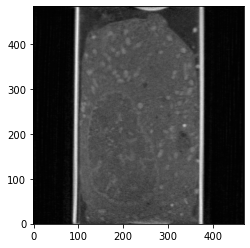

In [49]:
plt.imshow(img[200],cmap='gray',origin = 'lower')
plt.show()

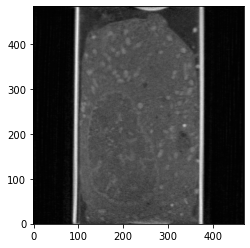

In [50]:
plt.imshow(norm[200],cmap='gray',origin = 'lower')
plt.show()

In [51]:
ahe_img = t1.equalize_ah()

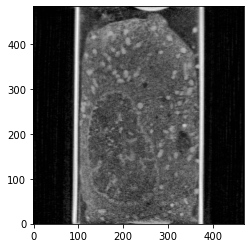

In [52]:
plt.imshow(ahe_img[200],cmap='gray',origin = 'lower')
plt.show()

In [38]:
ahe = norm_img()

0.03508606

In [39]:
img.min()

-0.00087320415